In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
pd.set_option("display.max_columns", 400)
df = pd.read_csv('/content/Car details v3.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [7]:
df.describe(percentiles = [.01, .25, .5, .75, .99]).round(2)

,year,selling_price,km_driven,seats
count,8128.00,8128.00,8128.00,7907.00
mean,2013.80,638271.81,69819.51,5.42
std,4.04,806253.40,56550.55,0.96
min,1983.00,29999.00,1.00,2.00
1%,2002.00,55000.00,4000.00,4.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,98000.00,5.00
99%,2019.00,5200000.00,225000.00,9.00
max,2020.00,10000000.00,2360457.00,14.00


In [8]:
#tirando da escala logaritima para uma visualização melhor
df.selling_price = df.selling_price /100
df.km_driven = df.km_driven /10
df.selling_price.describe()

count      8128.000000
mean       6382.718077
std        8062.534035
min         299.990000
25%        2549.990000
50%        4500.000000
75%        6750.000000
max      100000.000000
Name: selling_price, dtype: float64

In [9]:
df.describe(percentiles = [.01, .25, .5, .75, .99]).round(2)

,year,selling_price,km_driven,seats
count,8128.00,8128.00,8128.00,7907.00
mean,2013.80,6382.72,6981.95,5.42
std,4.04,8062.53,5655.06,0.96
min,1983.00,299.99,0.10,2.00
1%,2002.00,550.00,400.00,4.00
25%,2011.00,2549.99,3500.00,5.00
50%,2015.00,4500.00,6000.00,5.00
75%,2017.00,6750.00,9800.00,5.00
99%,2019.00,52000.00,22500.00,9.00
max,2020.00,100000.00,236045.70,14.00


In [10]:
#trunkando as variaveis em 99% para visualizar melhor os dados 
df['km_driven'] = np.where(df['km_driven'] > 50000.00, 50000.00, df['km_driven'])
df['selling_price'] = np.where(df['selling_price'] > 60000.00, 60000.00, df['selling_price'])

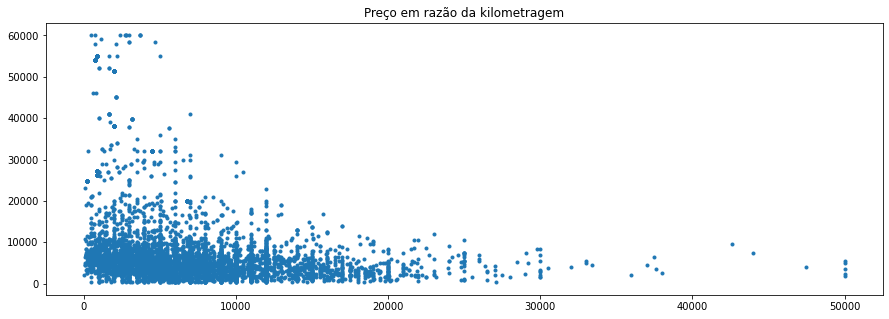

In [11]:
#visualizando o preço em rasão a kilometragem 
plt.figure(figsize=(15,5))
plt.plot(df.km_driven,df.selling_price,'.')
plt.title('Preço em razão da kilometragem');

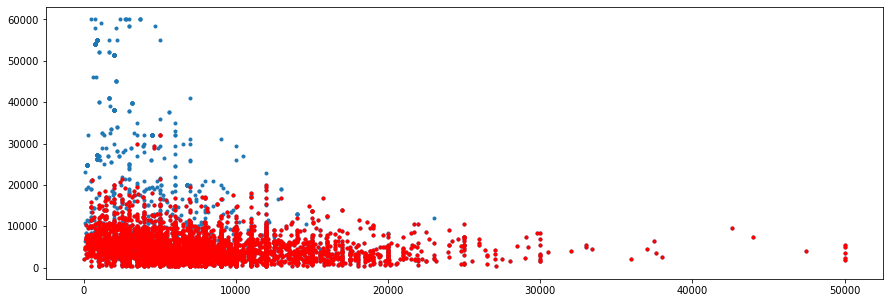

In [12]:
#verificando se o fato do carro ser manual afeta o preço 
plt.figure(figsize=(15,5))
plt.plot(df.km_driven,df.selling_price,'.')
plt.plot(df.loc[df.transmission=='Manual'].km_driven, df.loc[df.transmission=='Manual'].selling_price,'r.')


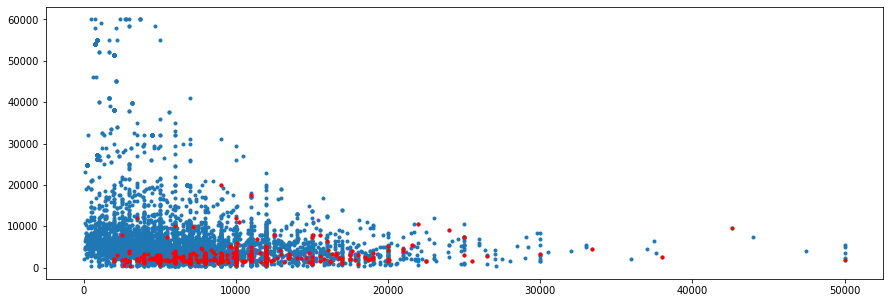

In [13]:
#verificando se o ano do carro em razão a kilometragem tem diferença no preço 
plt.figure(figsize=(15,5))
plt.plot(df.km_driven,df.selling_price,'.')
plt.plot(df.loc[df.year==2010].km_driven, df.loc[df.year==2010].selling_price,'r.')

In [14]:
df = df.drop(['name','mileage',	'engine',	'max_power',	'torque','seats'], axis = 1)

In [15]:
#fazendo onehot para transformar nossas variaveis em categoricas 
df_onehot = pd.get_dummies(df,drop_first=True) 
df_onehot

,year,selling_price,km_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,4500.0,14550.0,1,0,0,1,0,1,0,0,0,0
1,2014,3700.0,12000.0,1,0,0,1,0,1,0,1,0,0
2,2006,1580.0,14000.0,0,0,1,1,0,1,0,0,0,1
3,2010,2250.0,12700.0,1,0,0,1,0,1,0,0,0,0
4,2007,1300.0,12000.0,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,3200.0,11000.0,0,0,1,1,0,1,0,0,0,0
8124,2007,1350.0,11900.0,1,0,0,1,0,1,1,0,0,0
8125,2009,3820.0,12000.0,1,0,0,1,0,1,0,0,0,0
8126,2013,2900.0,2500.0,1,0,0,1,0,1,0,0,0,0


#Pipeline de modelagem


In [16]:
#separando nossa variavel target das variaveis 
X = df_onehot.drop('selling_price',axis =1)
y = df_onehot.selling_price
X

,year,km_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,14550.0,1,0,0,1,0,1,0,0,0,0
1,2014,12000.0,1,0,0,1,0,1,0,1,0,0
2,2006,14000.0,0,0,1,1,0,1,0,0,0,1
3,2010,12700.0,1,0,0,1,0,1,0,0,0,0
4,2007,12000.0,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,11000.0,0,0,1,1,0,1,0,0,0,0
8124,2007,11900.0,1,0,0,1,0,1,1,0,0,0
8125,2009,12000.0,1,0,0,1,0,1,0,0,0,0
8126,2013,2500.0,1,0,0,1,0,1,0,0,0,0


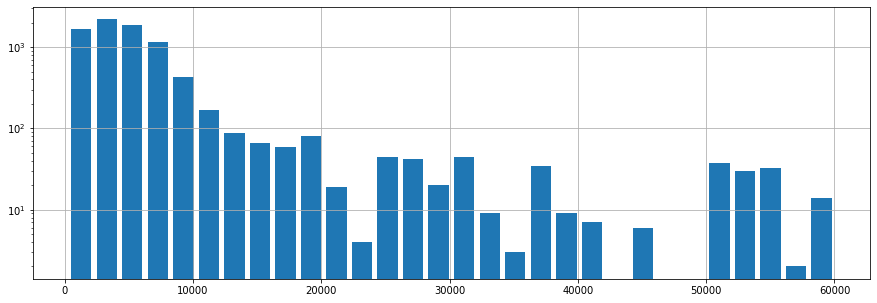

In [17]:
#visualizando nosso target price em escala logaritima para melhor entendimento 
plt.figure(figsize=(15,5))
plt.hist(y, bins = 30,log= True, rwidth=.8)
plt.grid()

In [18]:
#dividindo entre teste e treino 
from sklearn.model_selection import train_test_split
X_tr, X_ts,y_tr,y_ts =train_test_split(X,y ,test_size = 0.30, random_state= 666) 

In [19]:
X_tr.shape, X_ts.shape

((5689, 12), (2439, 12))

## Transformando as variaveis 

transformando as variaveis em escalas comparaveis aproximadamente entre-1 e 1 para o melhor entendimento do modelo 


$X_{novo} = \frac{X - média(X)}{std(X)}$
    


In [20]:
#uma forma de normalizar os dados manualmente 
(X_tr.km_driven - X_tr.km_driven.mean()) / X_tr.km_driven.std()

1514    0.467152
1782   -0.402689
3951   -0.816899
1004    0.839941
3977   -1.123414
          ...   
2878    1.047045
1950   -0.899741
7597    0.052942
1922    1.171308
6380   -0.402689
Name: km_driven, Length: 5689, dtype: float64

In [21]:
#normalizando as variaveis entre -1 e 1
from sklearn.preprocessing import StandardScaler

cols_scale = ['year','km_driven']

scaler = {} #vamos usar para obter a media real sem scala 
for col in cols_scale:
  scaler[col] = StandardScaler()
  scaler[col].fit(X_tr[[col]])

  X_tr.loc[:,col] = scaler[col].transform(X_tr[[col]])
  X_ts.loc[:,col] = scaler[col].transform(X_ts[[col]])

In [55]:
X_tr

,year,km_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1514,0.537659,0.467193,1,0,0,1,0,1,0,0,0,0
1782,-0.199565,-0.402724,0,0,1,1,0,1,1,0,0,0
3951,-0.691048,-0.816970,0,0,1,1,0,1,0,0,0,0
1004,-1.919755,0.840014,0,0,1,1,0,1,1,0,0,0
3977,0.291918,-1.123513,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2878,0.046176,1.047137,1,0,0,1,0,1,0,0,0,0
1950,-0.199565,-0.899820,0,0,1,1,0,1,0,0,0,0
7597,0.046176,0.052947,0,0,1,0,0,1,0,0,0,0
1922,-0.199565,1.171411,1,0,0,1,0,1,0,1,0,0


In [23]:
from sklearn.linear_model import LinearRegression
#fit_intercept = True para calcular o preço do carro padrão
lr = LinearRegression(fit_intercept=True, normalize =False, n_jobs = 3)# normalize = False pois ja normalizamos os dados  -1~1
lr.fit(X_tr,y_tr) #treinando o modelo 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(n_jobs=3, normalize=False)

In [24]:
#visualizando a predição 
y_pred = lr.predict(X_ts)
y_pred

array([ 7230.25669897,  5296.71185131,  8262.39083853, ...,
       11150.9790897 ,  5408.35617042,  3464.78202194])

In [60]:
y_ts

1433    7700.0
3619    2750.0
7222    9500.0
2712    3250.0
8080    3000.0
         ...  
7905    7000.0
6866    7500.0
4207    5000.0
6603    5000.0
904     8000.0
Name: selling_price, Length: 2439, dtype: float64

## Validando a predição com MSE e o MAE

In [26]:
#calculando o erro quadratico 
#raiz quadrada da media do meu erro elevado ao quadrado 
np.sqrt(((y_pred - y_ts)**2).mean())

5652.382410642783

em media nosso modelo esta errando 5.652 para menos ou para mais

In [27]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_ts,y_pred))

5652.382410642783

In [28]:
#erro absoluto medio 
np.sqrt((np.abs(y_pred - y_ts)).mean())

56.34231500571811

In [29]:
from sklearn.metrics import mean_absolute_error
np.sqrt(mean_absolute_error(y_ts,y_pred))

56.34231500571811

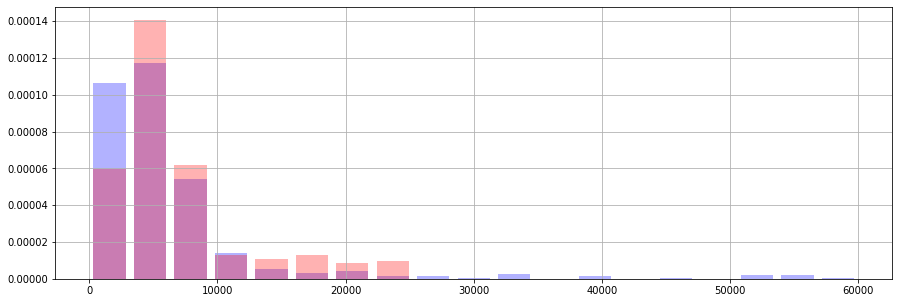

In [30]:
#comparando o nossos valor previsto pelo modelo com o nosso valor original do y_teste
plt.figure(figsize=(15,5))

Max = y_ts.max()
plt.hist(y_ts, bins = np.linspace(0,Max,20), rwidth=.8, alpha = .3,  color = 'b',density = True)
plt.hist(y_pred, bins = np.linspace(0,Max,20), rwidth=.8, alpha = .3, color = 'r',density = True)
plt.grid()

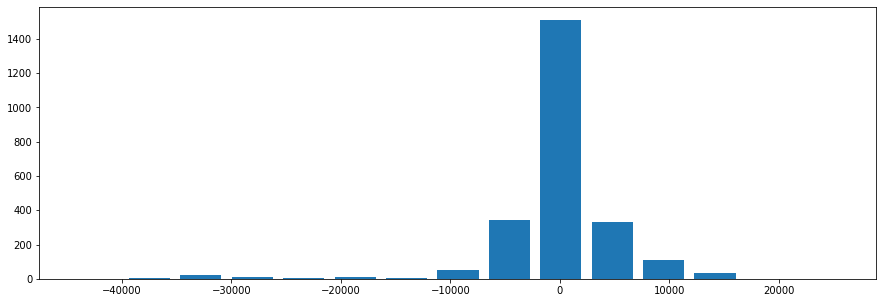

In [35]:
# o quanto nosso modelo esta errando 
plt.figure(figsize=(15,5))
plt.hist(y_pred-y_ts,bins = 15, rwidth=.8);

## Interpretação 

In [37]:
#Preço do nosso carro ideal 
lr.intercept_

17606.139643861716

O preço ideal(ou beta 0) é quando todas nossas variaveis estiverem zeradas ou seja quando todas nossas variaveis estiverem na media. 

In [38]:
#peso que o modelo esta dando para cada variavel 
lr.coef_

array([ 1.59251733e+03, -8.25629944e+02,  3.32479745e+03,  9.88765748e+02,
       -5.43917551e+02, -3.48446016e+03, -4.85747777e+03, -1.11384133e+04,
        3.26630437e+02, -4.01376794e+02,  2.64717363e+04,  1.51727481e+01])

In [40]:
#melhorando a visualização do coef 
for col, coef in zip(X_tr.columns,lr.coef_):
  print(f'{col:50s}:{coef:7.3f}')

year                                              :1592.517
km_driven                                         :-825.630
fuel_Diesel                                       :3324.797
fuel_LPG                                          :988.766
fuel_Petrol                                       :-543.918
seller_type_Individual                            :-3484.460
seller_type_Trustmark Dealer                      :-4857.478
transmission_Manual                               :-11138.413
owner_Fourth & Above Owner                        :326.630
owner_Second Owner                                :-401.377
owner_Test Drive Car                              :26471.736
owner_Third Owner                                 : 15.173


note que a relação do preço é por exemplo:
  - quanto maior km_driven menor o preço
  - quanto maior o ano maior o preço 

## interpretação sobre o impacto da variavel Km_driven

In [52]:
#usando scaler que definimos mais acima para obter o .mean_ e scale_
print('kilometros rodados',scaler['km_driven'].mean_, scaler['km_driven'].scale_)

kilometros rodados [6944.37140095] [4828.04658232]


Entendimento o carro Padrão definido pelo modelo **percorreu 6.944 KM** 
- a cada  **4.828 KM** a **mais** o carro barateia 825.630 no seu valor 
- a cada  **4.828 KM** a **menos** o carro encarece 825.630 no seu valor 

## interpretação sobre o impacto da variavel year

In [53]:
print('ano do carro ',scaler['year'].mean_, scaler['year'].scale_)

ano do carro  [2013.81209351] [4.06931782]


Entendimento o ano padrão definido pelo modelo(quando nossa variavel estava zerada) é **2013**

- a cada  **4 anos** a **mais** o carro encarece 1592.517 no seu valor 
- a cada  **4 anos** a **menos** o carro barateia 1592.517 no seu valor 

## interpretação da variavel Fuel

In [56]:
#melhorando a visualização do coef 
for col, coef in zip(X_tr.columns,lr.coef_):
  print(f'{col:50s}:{coef:7.3f}')

year                                              :1592.517
km_driven                                         :-825.630
fuel_Diesel                                       :3324.797
fuel_LPG                                          :988.766
fuel_Petrol                                       :-543.918
seller_type_Individual                            :-3484.460
seller_type_Trustmark Dealer                      :-4857.478
transmission_Manual                               :-11138.413
owner_Fourth & Above Owner                        :326.630
owner_Second Owner                                :-401.377
owner_Test Drive Car                              :26471.736
owner_Third Owner                                 : 15.173


O nosso carro padrão é usa combustivel **CNG**(gas de compressão natural)
- quando o automovel usa **Diesel** ele é 3.324 mais caro 
- quando ele usa **LPG** ele é 988.766 mais caro 
- quando usa **Petrol** ele é 543.918 mais barato